In [26]:
import json
import importlib
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import transform_data
importlib.reload(transform_data)
import calculate_frequencies
importlib.reload(calculate_frequencies)

5/5 (but 163)
6/15 (but 163)


<module 'calculate_frequencies' from 'd:\\Research\\tonal-adaptation\\calculate_frequencies.py'>

In [27]:
# import data
data = {}

with open("./data/output_data.json", "r") as output_data_file:
    try:
        data = json.load(output_data_file)["words"]
    except Exception as e:
        print(e)

onset_frequencies = { }
tone_frequencies = { }

for word_en, word_data in data.items():
    onset = word_data["onset_en_ipa"]
    onset_frequencies[onset] = onset_frequencies[onset] + 1 if onset in onset_frequencies else 1

    tone = word_data["onset_tone_num"]
    tone_frequencies[tone] = tone_frequencies[tone] + 1 if tone in tone_frequencies else 1

print(onset_frequencies)

frequencies, cond_probs = calculate_frequencies.get_data()

{'oʊ': 11, 'e': 53, 'ɑ': 26, 'ə': 26, 'eɪ': 18, 'ɪ': 14, 'æ': 42, 'i': 9, 'ɜr': 9, 'aɪ': 12, 'æn': 16, 'ɔ': 5, 'eɪn': 2, 'æk': 3, 'ɑr': 8, 'æʃ': 1, 'eɪs': 1, 'em': 1, 'el': 7, 'ɪz': 1, 'ɑk': 2, 'ɑn': 1, 'ɔl': 5, 'ed': 3, 'iv': 1, 'ɑrz': 1, 'æm': 2, 'æl': 5, 'ɪn': 3, 'ɑl': 2, 'ɔr': 2, 'en': 2, 'əl': 1, 'eɪmz': 1, 'ju': 1, 'ɑrm': 1, 'ɜrl': 1, 'ɪl': 1, 'ez': 2, 'aɪvz': 1, 'ɑg': 1, 'ɑs': 1, 'ɔz': 2, 'ɪr': 1, 'oʊl': 1, 'aɪk': 1}


In [28]:
# handle data
X = []
y = []

for word_en, word_data in data.items():
    onset = word_data["onset_en_ipa"][0]
    x = transform_data.vowel_qualities(word_data["onset_en_ipa"][0])
    x.append(word_data["stresses_en"][0])
    x.append(word_data["stresses_en"].index(1))
    x.append(onset_frequencies[word_data["onset_en_ipa"]])

    for tone in [1,2,3,4]:
        # @TODO - Compare utility of frequencies and cond_probs
        x.append(cond_probs["onset_tone_num"][str(tone)].get(word_data["onset_en_ipa"], False) or 0)
        x.append(frequencies["onset_en_ipa"][word_data["onset_en_ipa"]].get(str(tone), False) or 0)

    X.append(x)
    y.append(word_data["onset_tone_num"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [29]:
# create, train, and test model
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=100, min_samples_leaf=15)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[0.90322581 0.03225806 0.06451613 0.        ]]
([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0.2, 0, 0, 0, 0, 0], 2, 1)
[[0.     0.0625 0.     0.9375]]
([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0.2, 0, 0, 0, 0.07142857142857142, 0], 2, 4)
[[0.90322581 0.03225806 0.06451613 0.        ]]
([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0.08333333333333333, 0, 0, 0], 3, 1)
[[0.54166667 0.         0.         0.45833333]]
([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 26, 0.4482758620689655, 0, 0, 0, 0.08333333333333333, 0, 0.42857142857142855, 0], 3, 1)
[[0.90322581 0.03225806 0.06451613 0.        ]]
([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0.034482758620689655, 0, 0, 0, 0.08333333333333333, 0, 0, 0], 3, 1)
[[0.29411765 0.         0.05882353 0.64705882]]
([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 12, 0.06896551724137931, 0, 0, 0, 0.08333333333333333, 0, 0.32142857142857145, 0], 3, 4)
tone 1 accuracy: 40/55 (72.72727272727273%)
tone 2 accuracy: 0/2 (0.0%)
tone 3 accuracy: 0/4

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


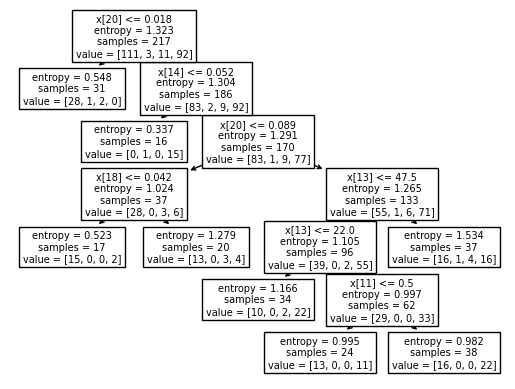

In [30]:
# display tree
plot_tree(clf)

# print outut
tone_comparisons = list(zip(X_test, y_test, y_pred))

# print metrics
tone_counts = [0, 0, 0, 0]
tone_corrects = [0, 0, 0, 0]

for tone_comparison in tone_comparisons:
    tone = int(tone_comparison[1])-1
    tone_counts[tone] = tone_counts[tone] + 1

    if tone_comparison[1] == tone_comparison[2]:
        tone_corrects[tone] = tone_corrects[tone] + 1

    if tone_comparison[1] in [2,3]:
        print(clf.predict_proba([tone_comparison[0]]))
        print(tone_comparison)

    # test_pred = clf.predict_proba([tone_comparison[0]])
    # if test_pred[0] == 0.90322581 and test_pred[1] == 0.03225806:
    #     if tone_comparison[1] not in [2,3]:
    #         print(tone_comparison)


for t in range(4):
    print(f"tone {t+1} accuracy: {tone_corrects[t]}/{tone_counts[t]} ({tone_corrects[t]/tone_counts[t] * 100}%)")

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))